AST 5151 - Principles of Planetary Physics
Math module
Joseph Harrington
Demo: Fourier transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [2]:
plt.ion()

In [3]:
n  = 1024
dt = 1
t  = np.arange(n)

Text(0.5, 1.0, 'Times of Samples')

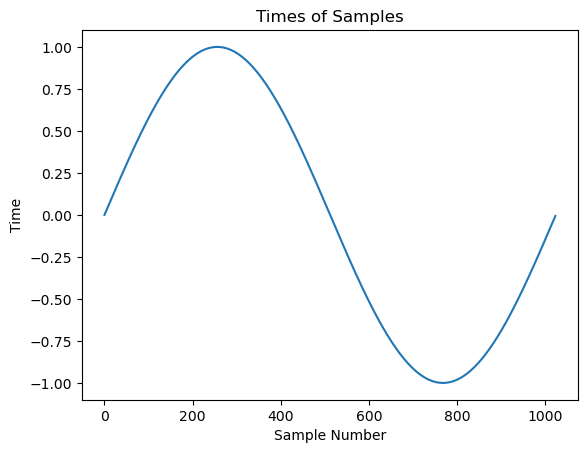

In [4]:
# simple sinusoidal signal
st = np.sin(2. * pi * t/n)
plt.plot(t)
plt.clf()
plt.plot(t, st)
plt.xlabel('Sample Number')
plt.ylabel('Time')
plt.title('Times of Samples')

0.0
0.0009765625
-0.0009765625
-0.001953125
0.5
0.4990234375
-0.4990234375


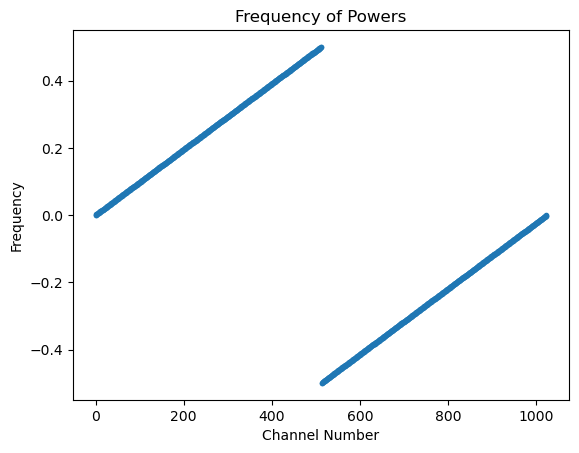

In [5]:
# n=8
# NOTE:  I'm going to do the example using the full, unoptimized
# fft(), so you can see how the frequencies fold and that the results
# are symmetric.  However, you can use rfft() and avoid all this
# baloney.
ft = np.fft.fft(st)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)
# look at frequencies
plt.clf()
plt.plot(ff, '.')
plt.xlabel('Channel Number')
plt.ylabel('Frequency')
plt.title('Frequency of Powers')
print(ff[0])		# DC term: no cycles per timestep
print(ff[1])		# low frequency: almost no cycles per timestep
print(ff[n-1])		# same, but negative
print(ff[n-2])
print(ff[int(n/2)])		# Nyquist: half a cycle per timestep
print(ff[int(n/2)-1])
print(ff[int(n/2)+1])

In [6]:
rft   = np.real(ft)	# real part
ift   = np.imag(ft)	# imaginary part
ampft = np.abs(ft) / n	# amplitude
phft  = np.arctan2(ift, rft)	# phase
psft  = ampft**2		# power spectrum

Text(0.5, 1.0, 'Real FFT')

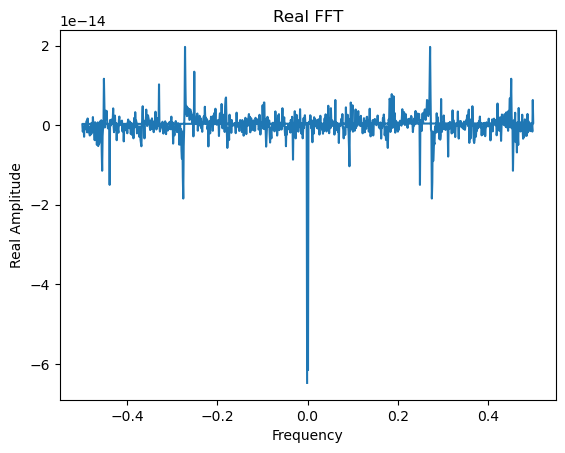

In [7]:
# real part
plt.clf()
plt.plot(ff, rft)		# note: LOW numbers
plt.xlabel('Frequency')
plt.ylabel('Real Amplitude')
plt.title('Real FFT')

Text(0.5, 1.0, 'Imag. FFT')

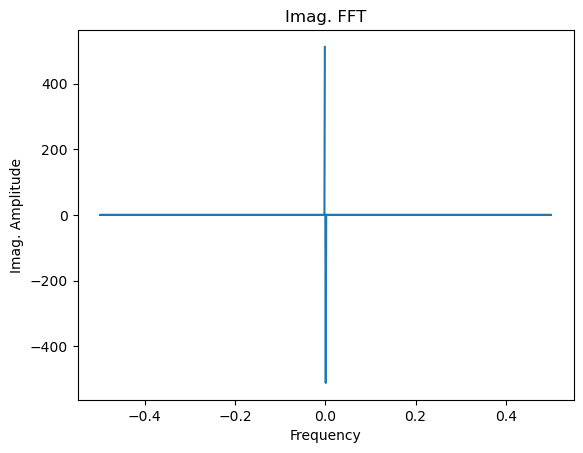

In [8]:
# imaginary part
plt.clf()
plt.plot(ff, ift)		# there's some power
plt.xlabel('Frequency')
plt.ylabel('Imag. Amplitude')
plt.title('Imag. FFT')

[4.55019461e-19 5.00000000e-01 2.67018546e-17 1.15750417e-17
 1.08322094e-17 9.52588793e-18 5.81376734e-18 5.85548863e-18
 1.82972838e-18 6.07697395e-18]


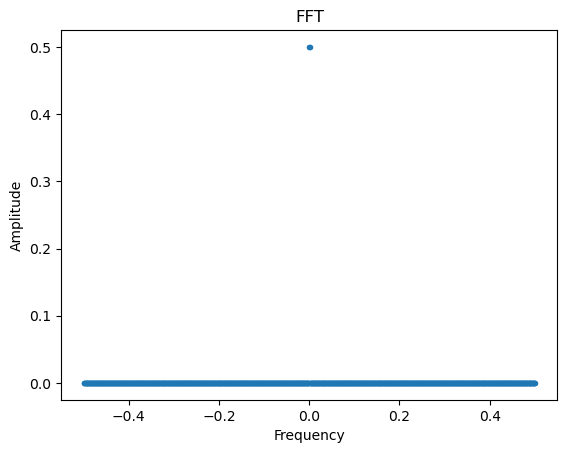

In [9]:
# amplitude spectrum
plt.clf()
plt.plot(ff, ampft, '.')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT')
print(ampft[0:10])	# power is split, half is in negative frequencies
# stretch to see middle

Text(0.5, 1.0, 'FFT')

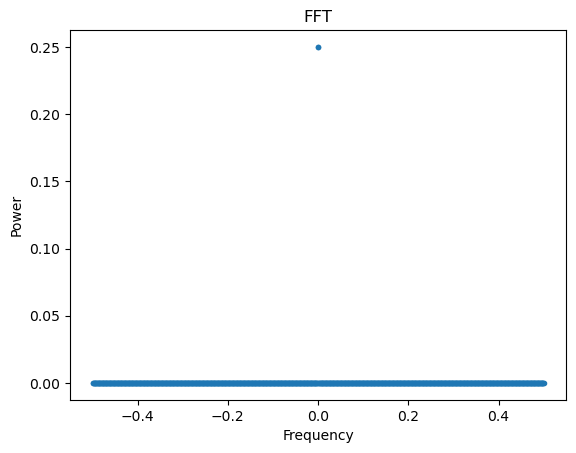

In [10]:
# power spectrum
plt.clf()
plt.plot(ff, psft, '.')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('FFT')

[ 0.         -1.57079633 -1.56196547 -1.50086887 -1.52098084 -1.52531981
 -1.1393043  -1.1805857  -1.96684036 -1.36130776]


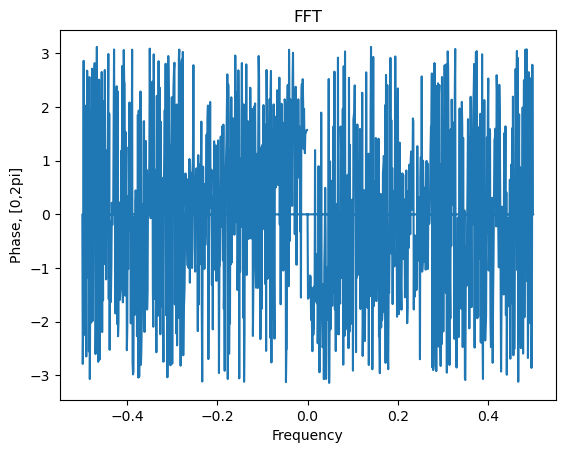

In [11]:
# phases
plt.clf()
plt.plot(ff, phft)
plt.xlabel('Frequency')
plt.ylabel('Phase, [0,2pi]')
plt.title('FFT')
print(phft[0:10])

Text(0.5, 1.0, 'FFT')

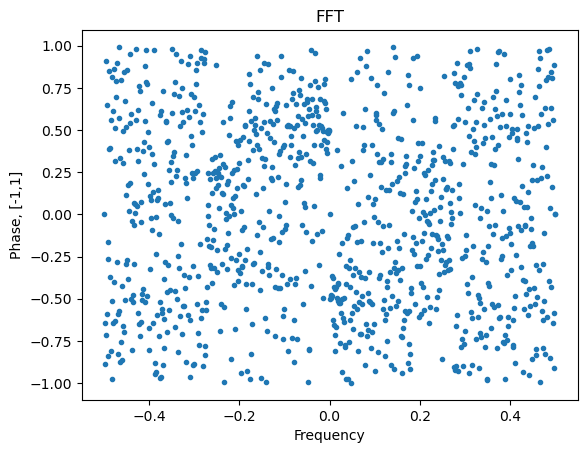

In [12]:
# phases going [-1,1] instead of [0,2pi]
plt.clf()
plt.plot(ff, phft/(pi), '.')
plt.xlabel('Frequency')
plt.ylabel('Phase, [-1,1]')
plt.title('FFT')
# stretch to see middle

Text(0.5, 1.0, 'FFT')

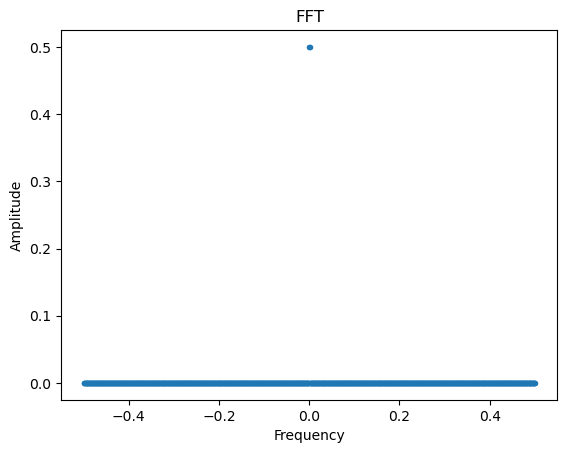

In [13]:
# Where is there actually power?  Phases of others don't matter.
plt.clf()
plt.plot(ff, ampft, '.')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT')

ok, let's play!

first, we're dealing with real numbers, so we'll just use the
positive frequencies

In [14]:
noise  = np.random.normal(size=n)
signal = 0.5 * np.sin(7. * 2. * pi * t/n)
sn     = signal + noise

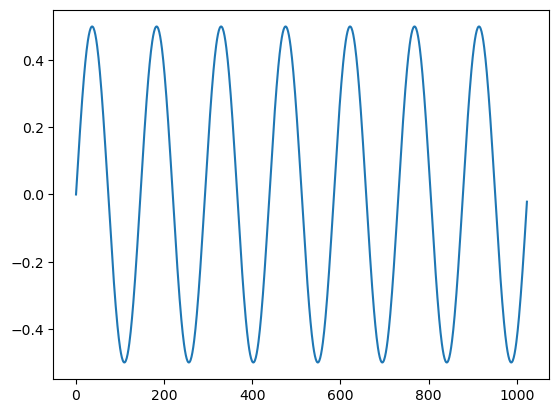

In [15]:
plt.clf()
plt.plot(t, signal)

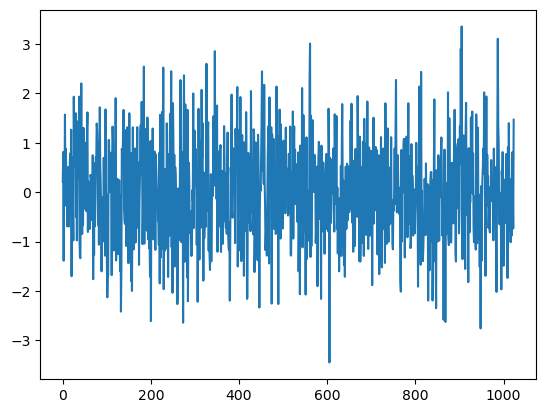

In [16]:
plt.clf()
plt.plot(t, noise)

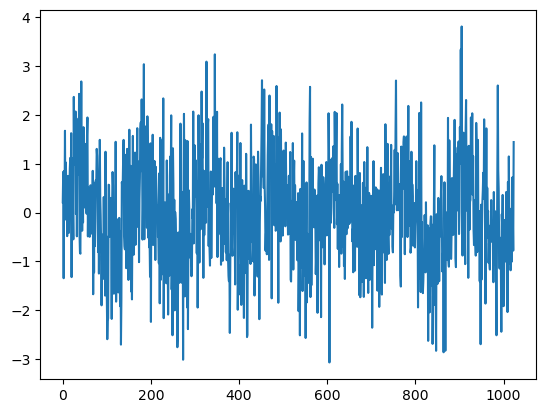

In [17]:
plt.clf()
plt.plot(t, sn)

In [18]:
ft = np.fft.fft(sn)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)
pft    = ft[0:int(n/2)]
pff    = ff[0:int(n/2)]
rpft   = np.real(pft)
ipft   = np.imag(pft)
amppft = np.abs(pft) / n
phpft  = np.arctan2(ipft, rpft)
pspft  = amppft**2
norm   = pspft[0]	 # mean of dataset squared
psd    = pspft/norm # power spectral density

(-0.025, 0.2)

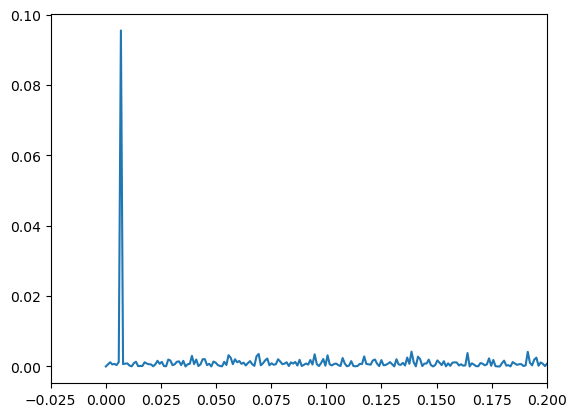

In [19]:
plt.clf()
plt.plot(pff, pspft) # FINDME,        xrange=[-0.025,.525], /xstyle)
plt.clf()
plt.plot(pff, pspft) # FINDME,        xrange=[-0.025,.200], /xstyle)
plt.xlim([-0.025,.2])

In [20]:
print(pspft[0:10])	# channel 7 is high, and that's the sine frequency

[8.64904851e-06 6.17075550e-04 1.19421308e-03 5.97276258e-04
 7.25497191e-04 4.12289634e-04 1.25396005e-03 9.55223670e-02
 6.72145932e-04 8.07885914e-04]


now make the signal small: 1/5 sigma!

In [21]:
signal = 0.2 * np.sin(7. * 2. * pi * t/n)

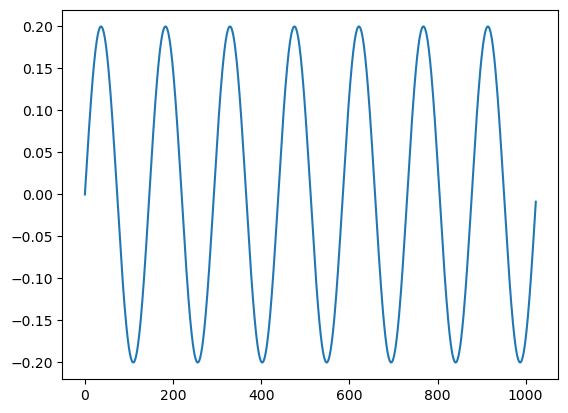

In [22]:
sn    = signal + noise
plt.clf()
plt.plot(t, signal)

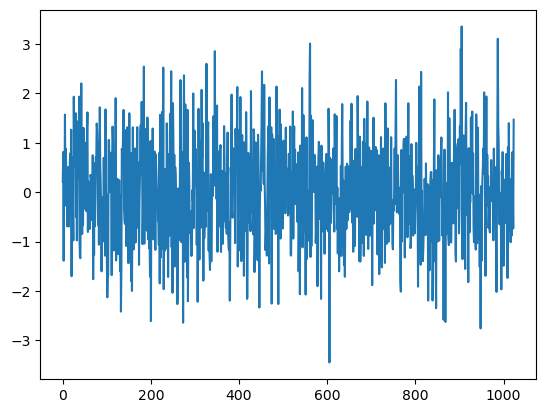

In [23]:
plt.clf()
plt.plot(t, noise)

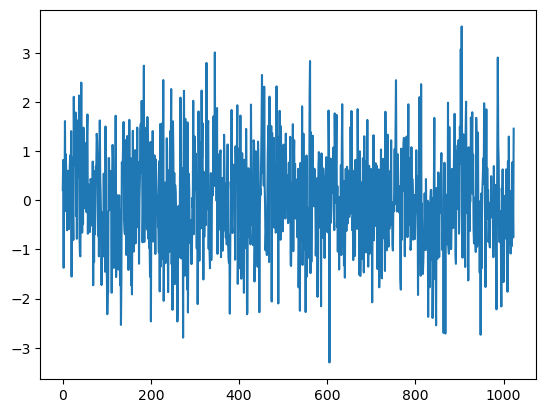

In [24]:
plt.clf()
plt.plot(t, sn)

In [25]:
ft = np.fft.fft(sn)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)
pft    = ft[0:int(n/2)]
pff    = ff[0:int(n/2)]

In [26]:
# everything we care about
rpft   = np.real(pft)
ipft   = np.imag(pft)
amppft = np.abs(pft) / n
phpft  = np.arctan2(ipft, rpft)
pspft  = amppft**2
norm   = pspft[0]
psd    = pspft/norm

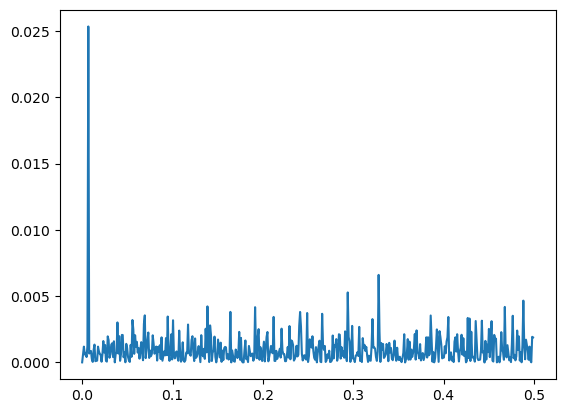

In [27]:
plt.clf()
plt.plot(pff, pspft)

(-0.025, 0.1)

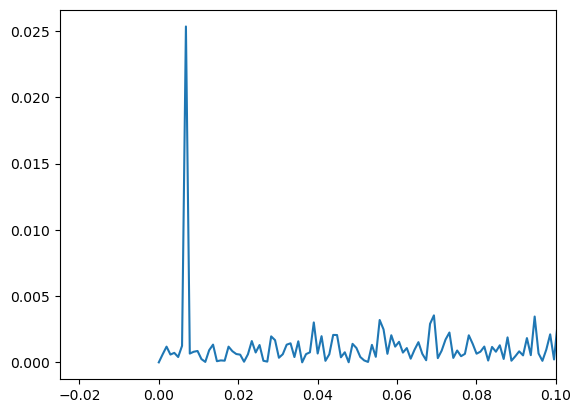

In [28]:
plt.clf()
plt.plot(pff, pspft)
plt.xlim([-0.025,0.1])

In [29]:
print(pspft[0:10])	# channel 7 is high, and that's the sine frequency

[8.64904851e-06 6.17075550e-04 1.19421308e-03 5.97276258e-04
 7.25497191e-04 4.12289634e-04 1.25396005e-03 2.53326113e-02
 6.72145932e-04 8.07885914e-04]


now add a second weak signal

In [30]:
signal =  0.2 * np.sin( 7. * 2. * pi * t/n) \
        + 0.2 * np.sin(12. * 2. * pi * t/n)

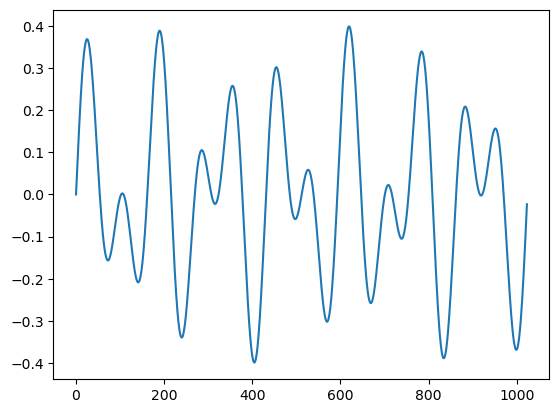

In [31]:
sn    = signal + noise
plt.clf()
plt.plot(t, signal)

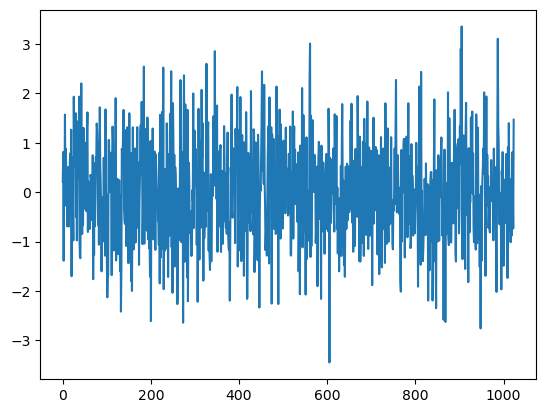

In [32]:
plt.clf()
plt.plot(t, noise)

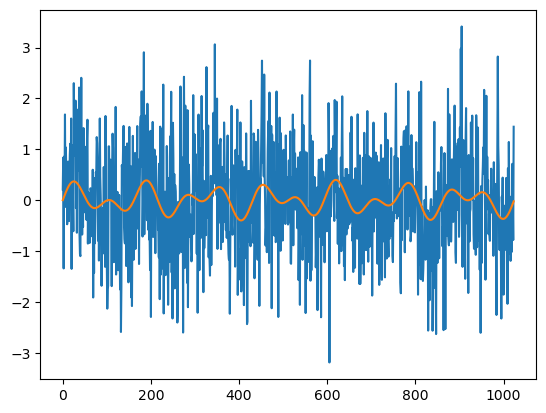

In [33]:
plt.clf()
plt.plot(t, sn)
plt.plot(t, signal)

In [34]:
ft = np.fft.fft(sn)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)
pft    = ft[0:int(n/2)]
pff    = ff[0:int(n/2)]
rpft   = np.real(pft)
ipft   = np.imag(pft)
amppft = np.abs(pft) / n
phpft  = np.arctan2(ipft, rpft)
pspft  = amppft**2
norm   = pspft[0]
psd    = pspft/norm

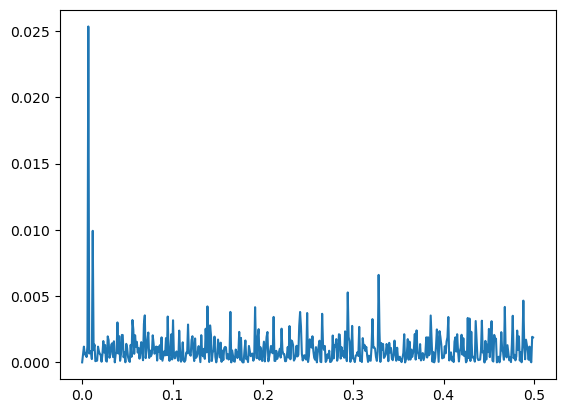

In [35]:
plt.clf()
plt.plot(pff, pspft)

[8.64904851e-06 6.17075550e-04 1.19421308e-03 5.97276258e-04
 7.25497191e-04 4.12289634e-04 1.25396005e-03 2.53326113e-02
 6.72145932e-04 8.07885914e-04 8.66781803e-04 2.56928265e-04
 9.92642752e-03 9.26689262e-04 1.34647386e-03]


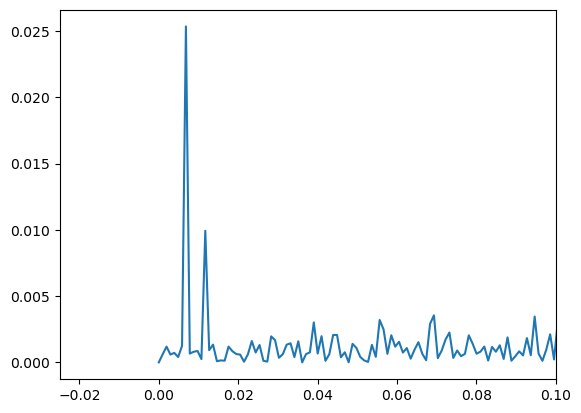

In [36]:
plt.clf()
plt.plot(pff, pspft)
plt.xlim([-0.025,0.1])
print(pspft[0:15])	# channels 7 and 12 high

how about a non-integer sinusoid?

In [37]:
signal = np.sin( 33.65 * 2. * pi * t/n)

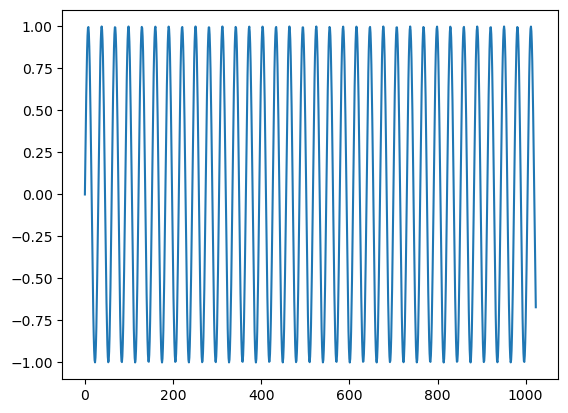

In [38]:
plt.clf()
plt.plot(t, signal)

In [39]:
ft = np.fft.fft(signal)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)
pft    = ft[0:int(n/2)]
pff    = ff[0:int(n/2)]

In [40]:
# everything we care about
rpft   = np.real(pft)
ipft   = np.imag(pft)
amppft = np.abs(pft) / n
phpft  = np.arctan2(ipft, rpft)
pspft  = amppft**2
norm   = amppft[0]
psd    = pspft/norm

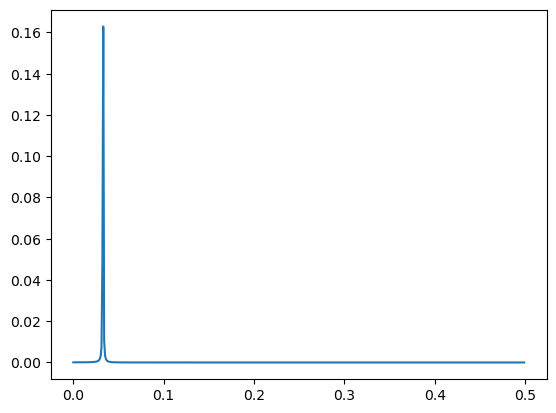

In [41]:
plt.clf()
plt.plot(pff, pspft)

(-0.025, 0.1)

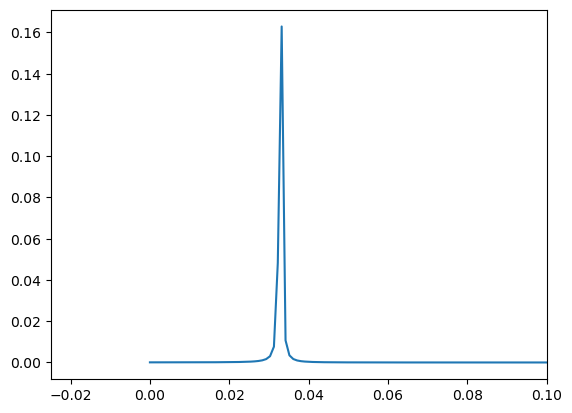

In [42]:
plt.clf()
plt.plot(pff, pspft)
plt.xlim([-0.025,0.1])

(-0.01, 0.05)

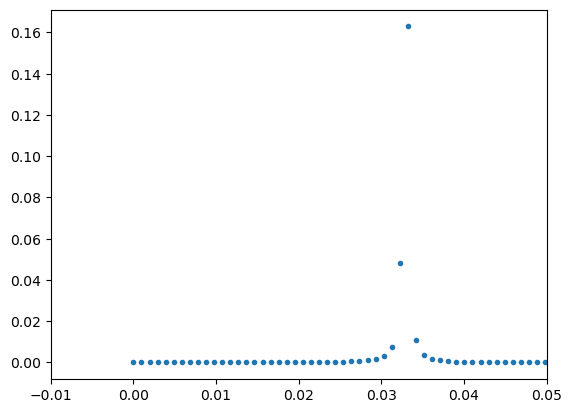

In [43]:
plt.clf()
plt.plot(pff, pspft, '.')
plt.xlim([-0.01,0.05])

periodic signals

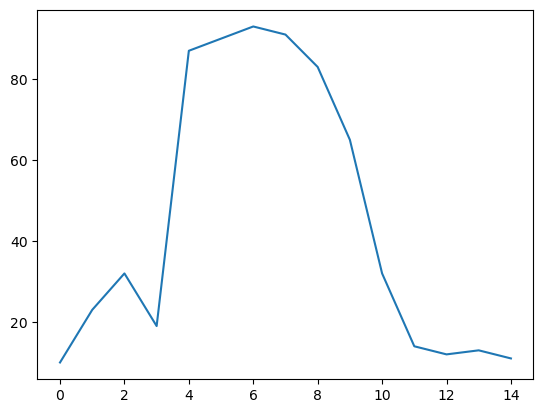

In [44]:
dt = 1
persig = np.array([10., 23, 32, 19, 87, 90, 93, 91, 83, 65, 32, 14, 12, 13, 11])
plt.clf()
plt.plot(persig)

In [45]:
# repeat that 30 times (using a Python broadcasting trick)
nrep = 30
signal = np.zeros((nrep, persig.size))
signal += persig
signal = signal.flatten()

In [46]:
# truncate that
n      = persig.size * nrep - 6
signal = signal[0 : n]
t      = np.arange(n)

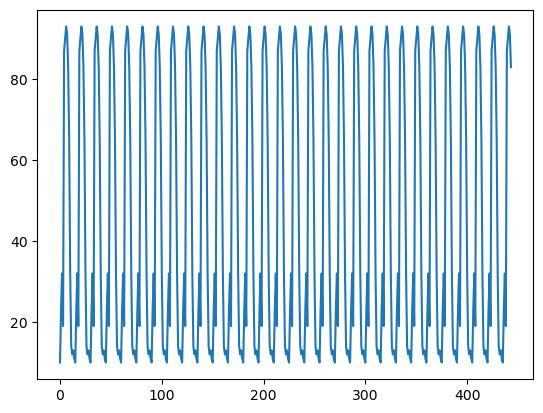

In [47]:
plt.clf()
plt.plot(t, signal)

In [48]:
ft = np.fft.fft(signal)
ff = np.concatenate( (np.arange(n/2+1.), -(np.arange(n/2-1.) + 1)[::-1]) ) / (n*dt)

In [49]:
# everything we care about
rft   = np.real(ft)	# real part
ift   = np.imag(ft)	# imaginary part
ampft = np.abs(ft) / n	# amplitude
phft  = np.arctan2(ift, rft)	# phase
psft  = ampft**2		# power spectrum

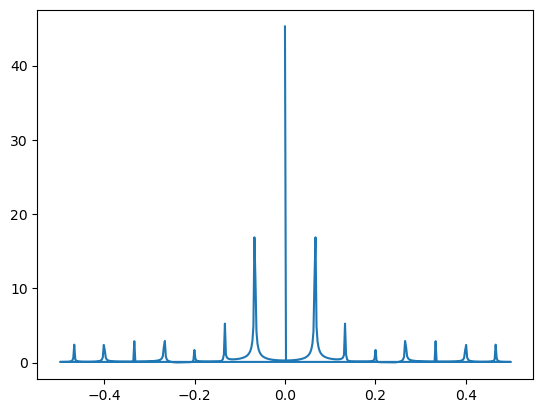

In [50]:
plt.clf()
plt.plot(ff, ampft)     # Harmonics!

In [51]:
print(signal.mean())
print(ampft[0])         # Yup, channel 0 is the data mean.

45.277027027027025
45.277027027027025


In [52]:
newt = t.copy()

In [53]:
newsig = 0
for k in np.arange(n):
  newsig += ampft[k] * np.sin(2. * pi * k * newt / n + phft[k] + pi/2.)

(0.0, 30.0)

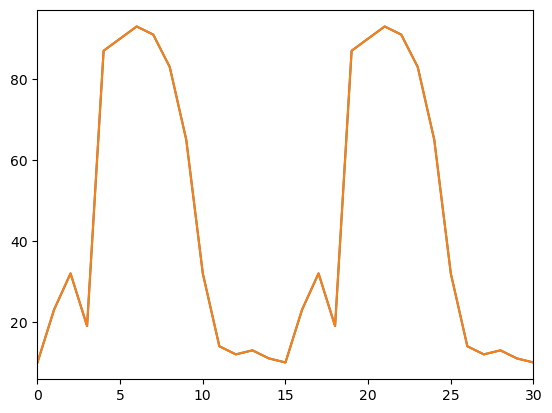

In [54]:
plt.clf()
plt.plot(   t, signal)
plt.plot(newt, newsig)
plt.xlim([0,30])

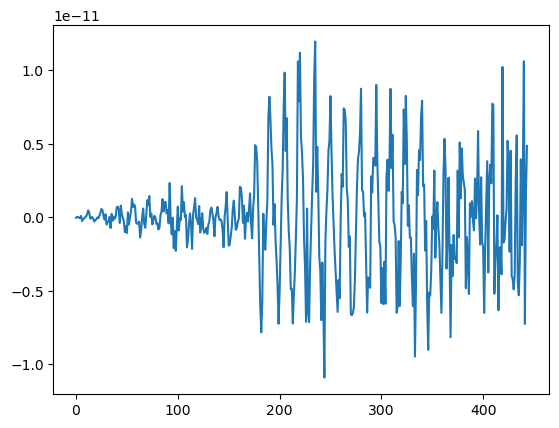

In [55]:
plt.clf()
plt.plot(newt, signal-newsig)

In [56]:
print(np.min(signal-newsig))
print(np.max(signal-newsig))

-1.0899725566559937e-11
1.1944223388127284e-11


approximate with just first 125 terms

In [57]:
newt = t.copy()

In [58]:
newsig = ampft[0]
for k in np.arange(125) + 1:
  newsig =  newsig \
          + 2*ampft[k] * np.sin(2. * pi * k * newt / n + phft[k] + pi/2.)

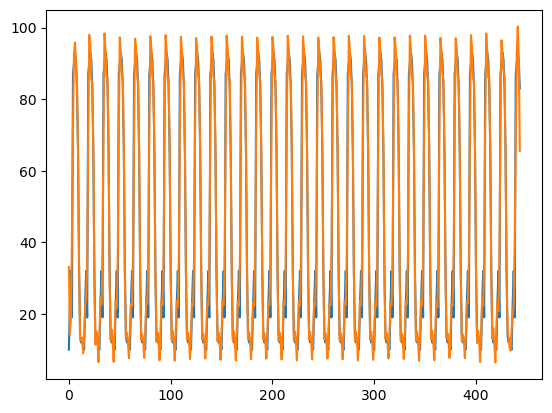

In [59]:
plt.clf()
plt.plot(   t, signal)
plt.plot(newt, newsig)

(0.0, 30.0)

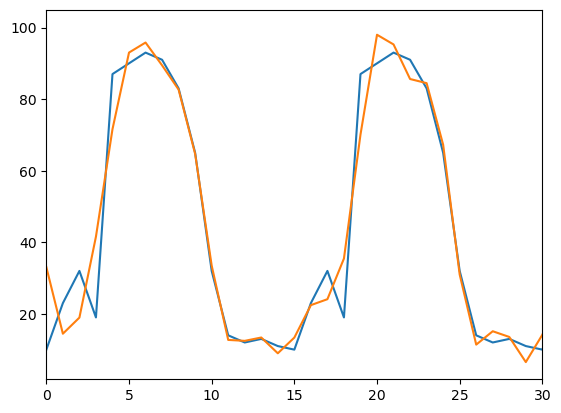

In [60]:
plt.clf()
plt.plot(   t, signal)
plt.plot(newt, newsig)
plt.xlim([0,30])

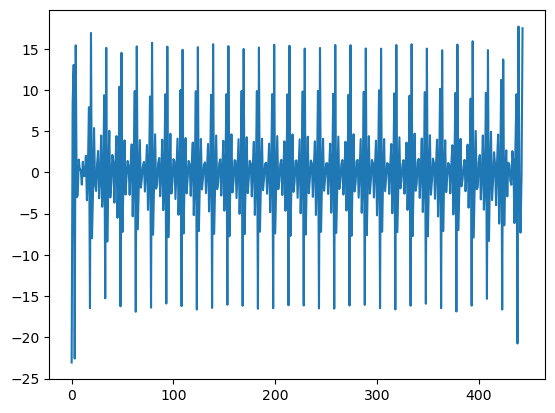

In [61]:
plt.clf()
plt.plot(newt, signal-newsig)

In [62]:
print(np.min(signal-newsig))
print(np.max(signal-newsig))

-23.05377057122179
17.699995436795433


create synthetic signal with 5.3 times more points, for interpolation

In [63]:
newt = np.arange(n * 5.3 ) / 5.3

In [64]:
newsig = ampft[0]
for k in np.arange(125)+1:
  newsig =  newsig \
          + 2*ampft[k] * np.sin(2. * pi * k * newt / n + phft[k] + pi/2.)

(0.0, 30.0)

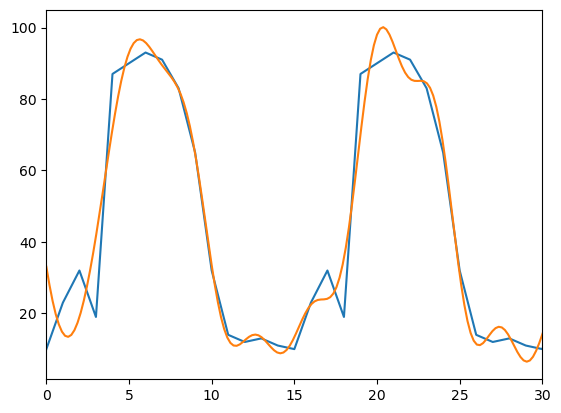

In [65]:
plt.clf()
plt.plot(t, signal)
plt.plot(newt, newsig)
plt.xlim([0,30])

periodogram
Fold with a given period, adjust the period to minimize spread in points.
An FFT gives a good first guess as to the folding period.

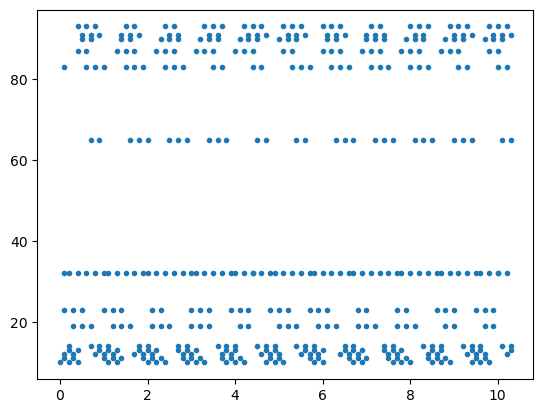

In [66]:
pert = t % 10.3
plt.clf()
plt.plot(pert, signal, '.')

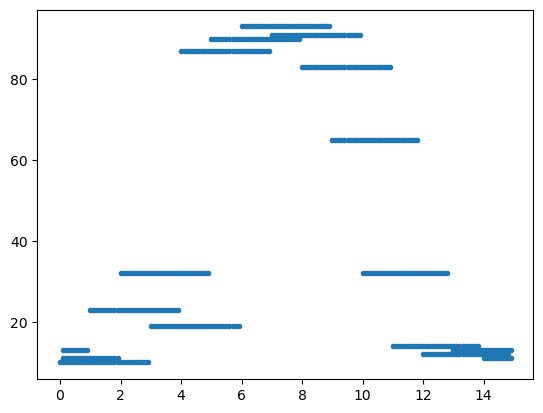

In [67]:
pert = t % 14.9
plt.clf()
plt.plot(pert, signal, '.')

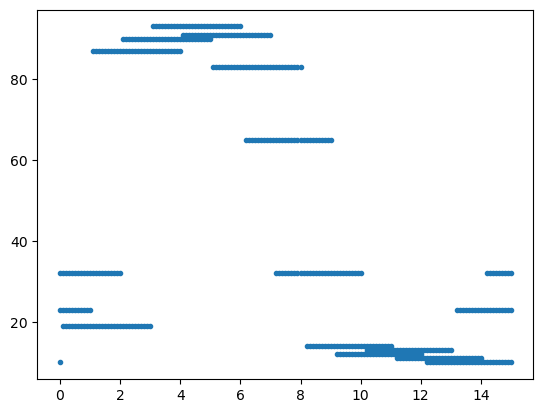

In [68]:
pert = t % 15.1
plt.clf()
plt.plot(pert, signal, '.')

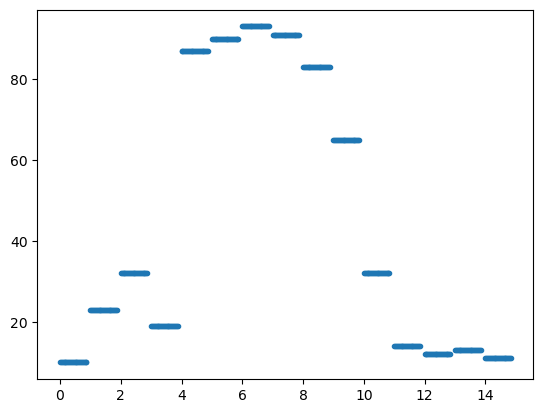

In [69]:
pert = t % 14.97
plt.clf()
plt.plot(pert, signal, '.')

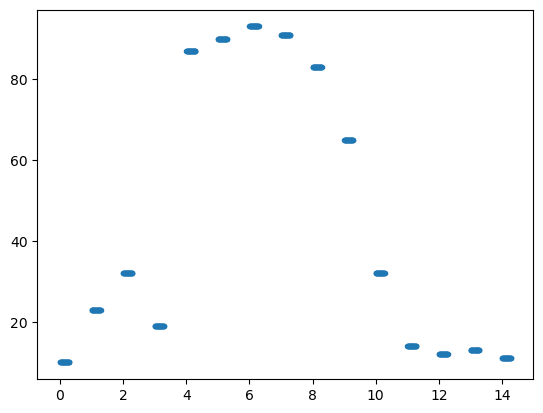

In [70]:
pert = t % 14.99
plt.clf()
plt.plot(pert, signal, '.')

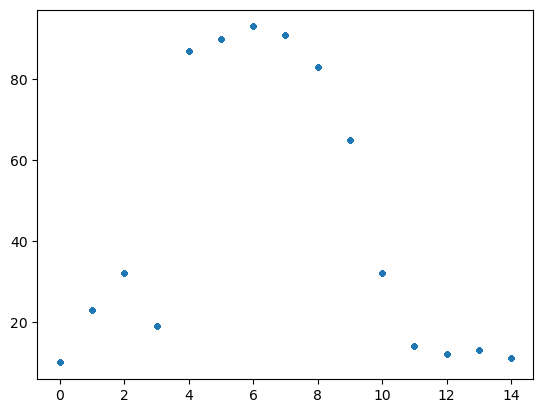

In [71]:
pert = t % 15
plt.clf()
plt.plot(pert, signal, '.')